# Time-Temperature Superposition



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

## 1 Read rheometer data

In [21]:
folder = r"H:\我的云端硬盘\Polymaker\003.挤出过程研究\003.挤出测试平台\实验数据\003.PLA L1003TTS"
folder = Path(folder)

In [65]:
df = pd.read_excel(folder / "polite polylite pla-140.xls", sheet_name="Frequency sweep - 1", header=[0, 1, 2])

In [62]:
df

Frequency sweep - 1                                                    \
       Storage modulus Loss modulus         Tan(delta) Angular frequency   
                   MPa          MPa Unnamed: 2_level_2             rad/s   
0             0.185837     0.152455           0.820368        628.319000   
1             0.146868     0.137141           0.933769        396.441000   
2             0.127899     0.123229           0.963485        250.140000   
3             0.094408     0.105454           1.117010        157.827000   
4             0.066647     0.087284           1.309640         99.581600   
5             0.044931     0.069800           1.553490         62.831900   
6             0.028840     0.053893           1.868680         39.643800   
7             0.017588     0.040175           2.284270         25.013700   
8             0.010179     0.028950           2.844190         15.782800   
9             0.005592     0.020213           3.614880          9.958090   
10            0.002927     0.013736           4.692980          6.283190   
11            0.001465     0.009124           6.229620          3.964410   
12            0.000707     0.005956           8.420040          2.501390   
13            0.000332     0.003843          11.566600          1.578270   
14            0.000154     0.002459          16.001900          0.995816   
15            0.000070     0.001564          22.226400          0.628319   

                                                       \
   Oscillation torque Step time Temperature Raw phase   
                 µN.m       min          °C         °   
0           4290.7000      0.10      160.01  115.4260   
1           4267.4500      0.21      159.97   71.4809   
2           4406.4100      0.32      159.93   54.1660   
3           4174.8600      0.43      159.90   52.9695   
4           3432.5500      0.55      159.88   55.0233   
5           2675.0000      0.66      159.87   58.4412   
6           2001.8400      0.77      159.87   62.4651   
7           1447.3300      0.88      159.86   66.6727   
8           1014.4000      1.00      159.87   70.7898   
9            691.2130      1.11      159.88   74.6197   
10           459.8350      1.22      159.90   78.0145   
11           299.9000      1.33      159.91   80.9039   
12           192.7440      1.44      159.92   83.2401   
13           122.7360      1.56      159.94   85.0662   
14            77.6786      1.73      159.96   86.4285   
15            49.0029      1.96      159.99   87.4266   

                                               
   Oscillation displacement Complex viscosity  
                        rad              Pa.s  
0                  0.000710           382.561  
1                  0.000820           506.864  
2                  0.000803           710.021  
3                  0.000871           896.797  
4                  0.000885          1102.810  
5                  0.000893          1321.160  
6                  0.000899          1541.840  
7                  0.000901          1753.280  
8                  0.000901          1944.350  
9                  0.000897          2106.020  
10                 0.000890          2235.230  
11                 0.000882          2330.910  
12                 0.000873          2397.950  
13                 0.000865          2444.050  
14                 0.000857          2473.960  
15                 0.000851          2491.010

In [66]:
ang_freq = df.iloc[:, 3]
storage = df.iloc[:, 0]
loss = df.iloc[:, 1]
comp_visc = df.iloc[:, 9]

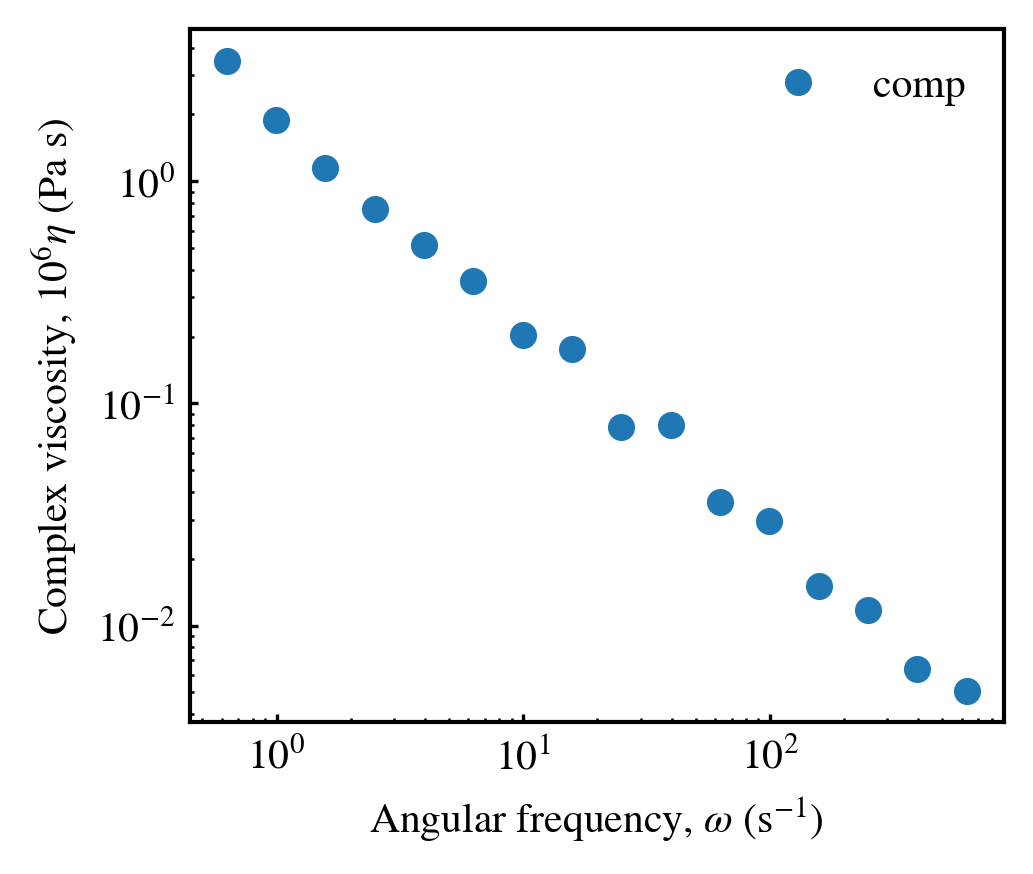

In [75]:
# plt.plot(ang_freq, storage, "o", label="storage")
# plt.plot(ang_freq, loss, "o", label="loss")
plt.plot(ang_freq, comp_visc*10e-6, "o", label="comp")
# plt.xlim([0.1, 700])
# plt.ylim([0.0])
plt.loglog()
plt.xlabel("Angular frequency, $\\omega$ (s$^{-1}$)")
plt.ylabel("Complex viscosity, $10^6\\eta$ (Pa s)")
plt.legend()

Plot viscosity data at multiple temperatures.

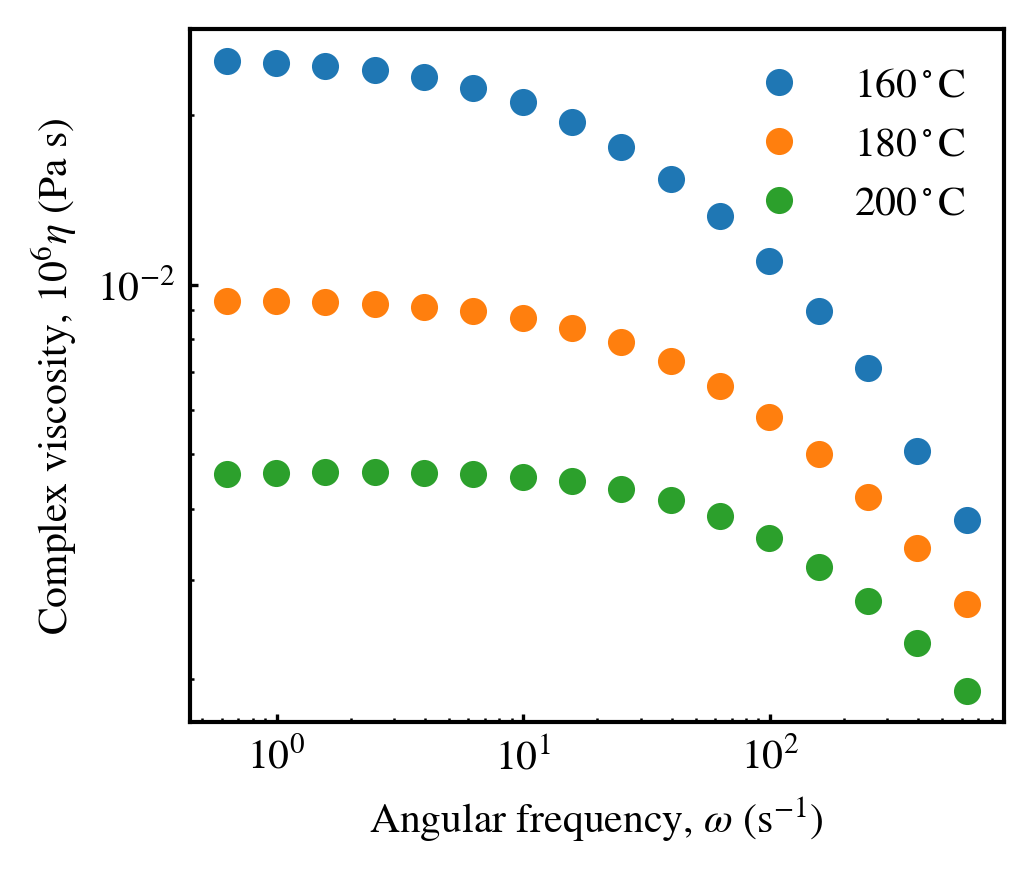

In [84]:
for T in [160, 180, 200]:
    df = pd.read_excel(folder / f"polite polylite pla-{T:d}.xls", sheet_name="Frequency sweep - 1", header=[0, 1, 2])
    comp_visc = df.iloc[:, 9]
    plt.plot(ang_freq, comp_visc*10e-6, "o", label=f"{T:d}$^\\circ$C")
plt.loglog()
plt.xlabel("Angular frequency, $\\omega$ (s$^{-1}$)")
plt.ylabel("Complex viscosity, $10^6\\eta$ (Pa s)")
plt.legend()

In [86]:
w = 1920
h = 1200
dia = 13.3
PPI = (w**2 + h**2) ** 0.5 / dia
PPI

170.23725351079585

In [87]:
5000 / 14

357.14285714285717

# Appendix

# A. Compare Andrade-Eyring and WLF equations

In [12]:
T = np.linspace(400, 500)
T0 = 400
E = 30e3 # E_eta
R = 8.314 # natural const
C1 = 17.44
C2 = 51.6

# Andrade-Eyring equation
log_ae = E / R * (1/T - 1/T0)

# Willianms-Landel-Ferry equation
log_wlf = -C1 * (T - T0) / (C2 + T - T0)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Zhengyang Liu\AppData\Local\Temp\ipykernel_548\1284262816.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\eta / \eta_0$")


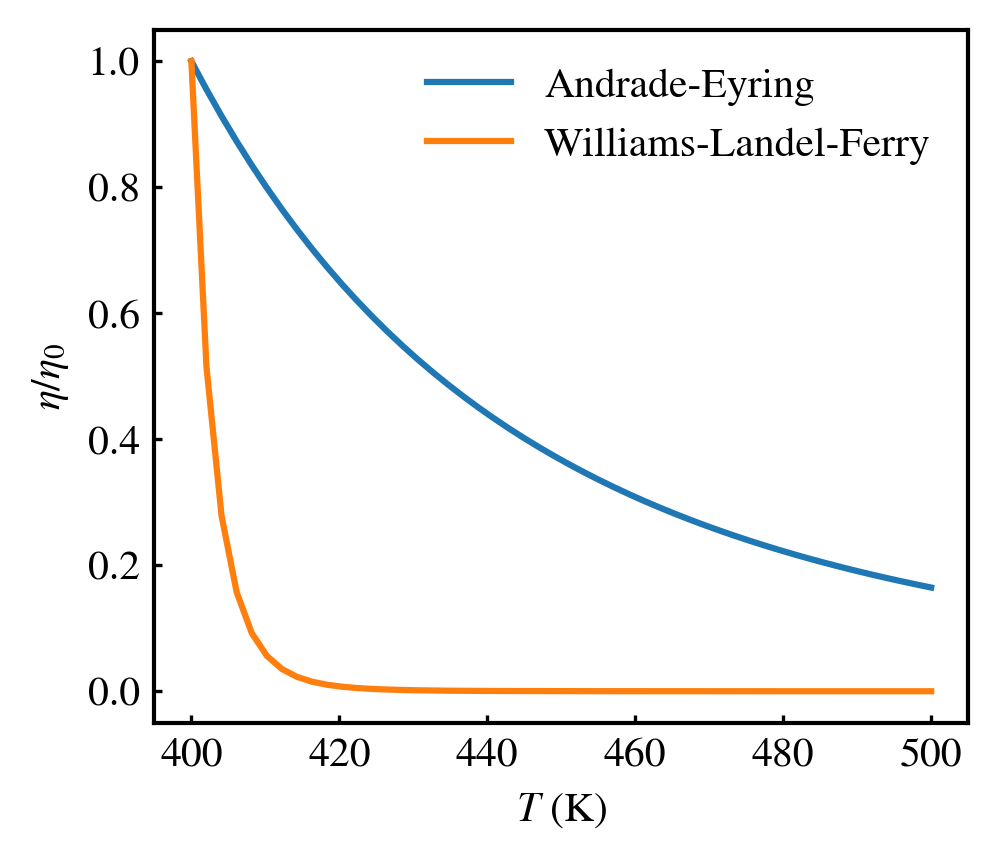

In [13]:
plt.plot(T, np.exp(log_ae), label="Andrade-Eyring")
plt.plot(T, np.exp(log_wlf), label="Williams-Landel-Ferry")
plt.xlabel("$T$ (K)")
plt.ylabel("$\eta / \eta_0$")
plt.legend()